# Eduardo Callejas P. Actividad 5
# Descripción de Actividades
- Para esta sesión trabajaremos con la base de datos sobre cáncer mamario de Wisconsin. El objetivo es desarrollar un Clasificador mediante Máquinas de Soporte de Vectores que predica de forma adecuada en base a una serie de atributos sobre la composición del núcleo de una célula mamaria. Para más detalles técnicos asociados a la base de datos, pueden hacer click en el link.

# Desafío 1: 
- Preparar el ambiente de trabajo
- Importe todas las librerías a utilizar. 
- Fije los parámetros de los gráficos con  plt.Rcparams 
- Excluya las columnas id y Recodifique el vector objetivo *diagnosis* a numérico para poder procesarlo posteriormente.
    

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


In [2]:
plt.rcParams['figure.figsize']=(10, 6)

In [3]:
df = pd.read_csv('breast_cancer.csv').drop(columns=['id','Unnamed: 32'])

In [4]:
df['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'])

'M' = 1 y 'B' =0 

In [5]:
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean           ...             radius_worst  texture_worst  \
0         0.2419           ...                    25.38          17.33   
1         0.1812           ...                    24.99          23.41   
2         0.2069           ...                    23.57          25.53   
3         0.2597           ...                    14.91          26.50   
4         0.1809           ...                    22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678  

[5 rows x 31 columns]

# Desafío 2: Visualizando la distribución de los atributos
- Para cada uno de los atributos, grafique los histogramas condicional a cada clase del vector objetivo.
- Agregue las medias correspondientes y reporte a grandes rasgos cuáles son los atributos con una mayor similitud en la distribución.

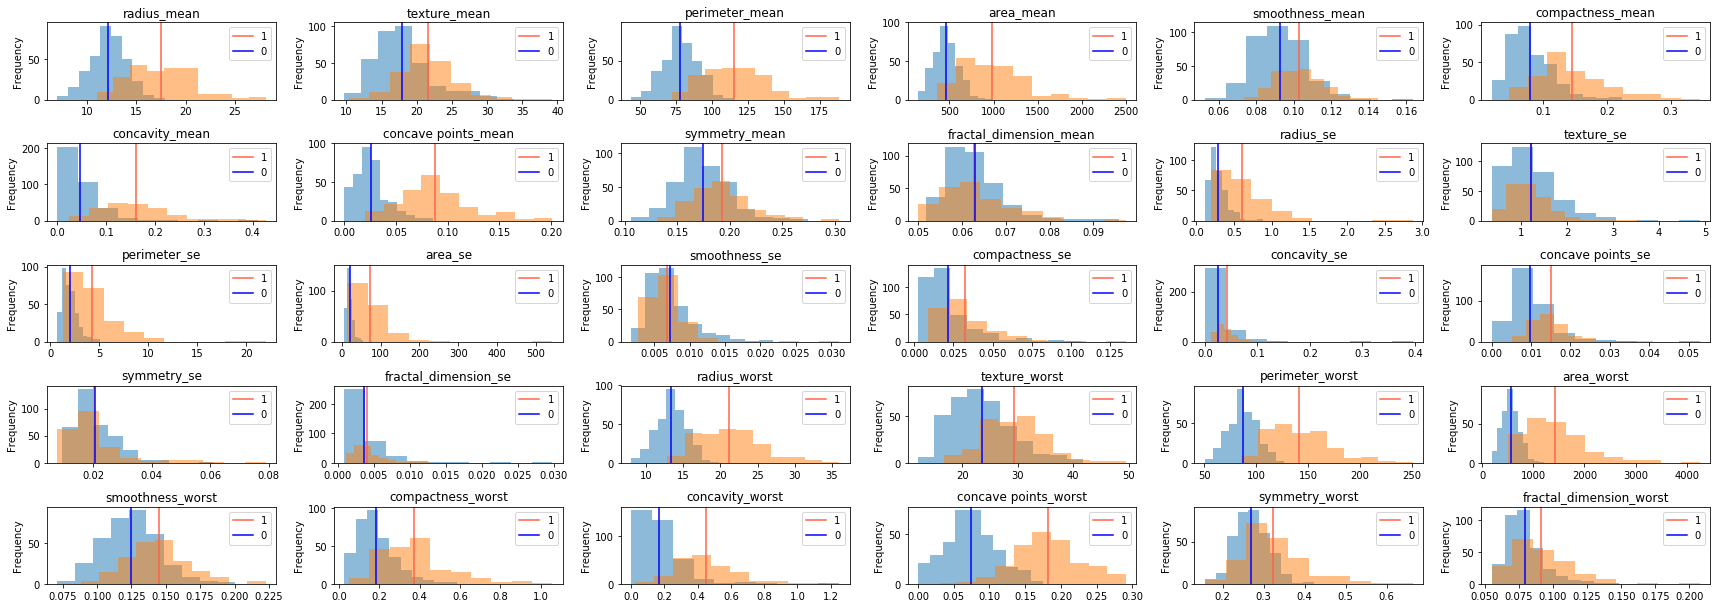

In [6]:
plt.figure(figsize=(24, 10))
for n, i in enumerate(df.drop(columns = ['diagnosis']).columns):
    plt.subplot(6, 6, n + 1)
    df.groupby('diagnosis')[i].plot(kind='hist', alpha=.5)
    plt.axvline(np.mean(df.query('diagnosis==1')[i]), color='tomato')
    plt.axvline(np.mean(df.query('diagnosis==0')[i]), color='blue')
    plt.legend(df['diagnosis'].unique())
    plt.title(i)
    plt.tight_layout()

Los parametros 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smothness_se', 'symmetry_se', 'symmetry_worst' tienen distribuciones similares tanto en los tumores benignos como malignos, por lo que a priori, no seran atributos relevantes al momento de generar nuestro modelo

# Desafío 3: Estimando el porcentaje de overlap en los atributos
- Parte de las virtudes de las Máquinas de Soporte Vectorial es la capacidad de lidiar con clases no separables mediante el proceso de kernelización. Resulta que un aspecto importante que muchas veces se obvía es medir la noseparabilidad de los atributos, condicional a cada clase del vector objetivo.

In [7]:
h1, _ = np.histogram(df['symmetry_mean'], bins=100) # estimamos la frecuencia de obs. en 100 espacios definidos
h2, _ = np.histogram(df['fractal_dimension_mean'], bins=100) # estimamos la frecuencia de obs. en 100 espacios definidos
get_minima = np.minimum(h1, h2)      # extraemos el mínimo de observaciones comunes entre h1 y h2
intersection = np.true_divide(np.sum(get_minima), np.sum(h2)) # Estimamos la intersección de elementos comunes

In [8]:
intersection

0.5957820738137083

In [9]:
overlap = []
for column in df.drop(columns='diagnosis'):
    h1, _ = np.histogram(df.query('diagnosis==0')[column], bins=100)
    h2, _ = np.histogram(df.query('diagnosis==1')[column], bins=100)
    get_minima = np.minimum(h1, h2)
    intersection = np.true_divide(np.sum(get_minima), np.sum(h2))
    overlap.append((column,intersection))

In [10]:
df_overlap = pd.DataFrame(overlap)

In [11]:
df_overlap.columns = ['atributo','overlap']

In [12]:
df_overlap.sort_values(by='overlap',ascending=False, inplace=True)

In [13]:
df_overlap

atributo   overlap
9    fractal_dimension_mean  0.886792
15           compactness_se  0.882075
5          compactness_mean  0.872642
29  fractal_dimension_worst  0.872642
10                radius_se  0.867925
21            texture_worst  0.867925
18              symmetry_se  0.863208
8             symmetry_mean  0.858491
1              texture_mean  0.858491
24         smoothness_worst  0.844340
25        compactness_worst  0.816038
11               texture_se  0.806604
4           smoothness_mean  0.792453
3                 area_mean  0.792453
7       concave points_mean  0.783019
28           symmetry_worst  0.778302
0               radius_mean  0.778302
20             radius_worst  0.764151
22          perimeter_worst  0.740566
23               area_worst  0.731132
2            perimeter_mean  0.731132
27     concave points_worst  0.731132
12             perimeter_se  0.721698
17        concave points_se  0.707547
13                  area_se  0.683962
14            smoothness_se  0.646226
19     fractal_dimension_se  0.495283
16             concavity_se  0.438679
6            concavity_mean  0.386792
26          concavity_worst  0.363208

# Desafío 3: Selección del modelo por GridSearchCV 
- Entrene una serie de modelos SVC con los siguientes hiperparámetros: . gamma: [0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10] .
Validaciones cruzadas: 10.
- Genere un heatmap en base a los puntajes estimados con GridSearchCV .
- *tip*: Vea cómo acceder a la llave mean_test_score en el diccionario cv_results_ .
- Reporte en qué rango de cada hiperparámetro el modelo presenta un desempeño eficiente. Reporte la mejor combinación de hiperparámetros y el desempeño en la muestra de entrenamiento.

In [14]:


# Generamos las muestras de entrenamiento y validación

df_scaled = StandardScaler().fit_transform(df.loc[:, 'radius_mean':'fractal_dimension_mean'])
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df['diagnosis'], random_state=11238, test_size=.33)


In [15]:
params = {'C':[1,10,100,1000,10000,100000],'gamma':[0.00001, 0.0001,0.001,0.01,0.1,1]}

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
estimate_cv = GridSearchCV(SVC(kernel='rbf'),params, cv= 10)

In [18]:
estimate_cv.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 10, 100, 1000, 10000, 100000], 'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [19]:
estimate_cv.best_params_

{'C': 10, 'gamma': 0.1}

In [21]:
score = estimate_cv.cv_results_

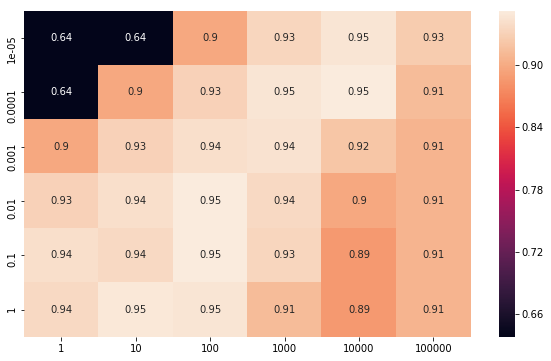

In [22]:
sns.heatmap(pd.DataFrame(score['mean_test_score'].reshape(6,6)),annot=True, xticklabels=[1,10,100,1000,10000,100000], yticklabels=[0.00001, 0.0001,0.001,0.01,0.1,1])

El modelo tiene buen rendimiento, excepto en la combinación de valores pequeños de C y valores pequeños de gamma (esquina superior izquierda)

# Desafío 4: Validación del modelo en el hold-out sample
- Genere las predicciones del hold-out sample en base a la mejor combinación de hiperparámetros. 
- Genere un reporte con las métricas de desempeño clásicas para los modelos de clasificación. Comente en qué casos el modelo presenta un desempeño deficiente

In [25]:
refactor_svc_rbf = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='rbf', C=10, gamma=0.1))
])
refactor_svc_rbf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [30]:
yhat = refactor_svc_rbf.predict(X_test)
print(classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.97      0.94      0.96       114
           1       0.91      0.96      0.93        74

   micro avg       0.95      0.95      0.95       188
   macro avg       0.94      0.95      0.94       188
weighted avg       0.95      0.95      0.95       188



en el caso de los tumores malignos presenta un 91% de precision, que es el más bajo . Es un buen modelo en general